In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
R = np.array([[1,0.4045],[0.4045,1]])  ### autocorrelation matrix
P = np.array([[0],[0.2939]])           ### cross correlation vector

Text(0.5, 0, 'cost function')

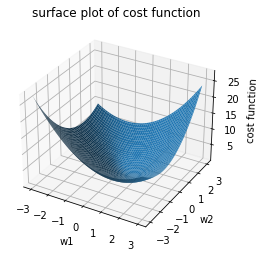

In [4]:
w_1 = np.linspace(-3,3,100)
w_2 = np.linspace(-3,3,100)
w_1,w_2 = np.meshgrid(w_1,w_2)
error_surface =    0.5 -0.5878*w_2 + w_1**2 + 0.809*w_1*w_2 + w_2**2
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot_surface(w_1,w_2,error_surface)
ax.set_title("surface plot of cost function")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("cost function") 

In [5]:
#### finding the optimal weights
w_o = np.linalg.inv(R)@P
w_o

array([[-0.14213944],
       [ 0.3513954 ]])

Text(0, 0.5, 'w2')

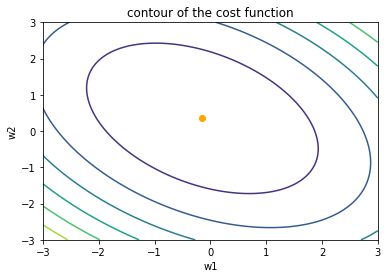

In [6]:
### contour plot
fig = plt.figure()
ax = plt.axes()
ax.contour(w_1,w_2,error_surface)
ax.scatter(w_o[0],w_o[1],color = "orange") ### orange color dot represent the optimum weights
ax.set_title("contour of the cost function")
ax.set_xlabel("w1")
ax.set_ylabel("w2")

In [7]:
### eigen value analysis of correlation matrix R
e_val,e_vect = np.linalg.eig(R)
e_val

array([1.4045, 0.5955])

In [8]:
### performing steepest descent method 
w_i = np.array([[-1],[-2]]) ### initial guess [-1,-2]^T
w_opt = w_o ### optimal value from wiener-hopf equation
weight_array1 = [] 
weight_array2 = []### list of weights obtained from method 
weight_array1.append(w_i[0])
weight_array2.append(w_i[1])
#### 5000 iterations
step_value = 0.05   ### 0 < stepvalue < 2/lambda_max
for i in range(5000) :
    w_new = np.zeros(w_i.shape)
    grad_w1 = 2*w_i[0] + 0.809*w_i[1]
    grad_w2 = 0.809*w_i[0] + 2*w_i[1] - 0.5878
    w_new[0] = w_i[0] - 0.5*step_value*grad_w1
    w_new[1] = w_i[1] - 0.5*step_value*grad_w2
    weight_array1.append(w_new[0])
    weight_array2.append(w_new[1])
    w_i = w_new
    
    


the optimal weights from wiener-hopf equation [[-0.14213944]
 [ 0.3513954 ]]
the weights from steepest descent method with 5000 iterations [[-0.14213944]
 [ 0.3513954 ]]


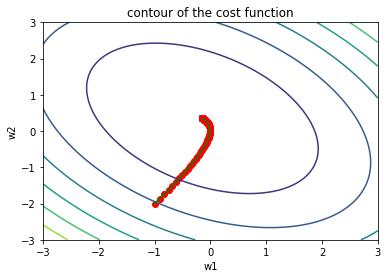

In [11]:
##### plotting the convergence path
fig = plt.figure()
ax = plt.axes()
ax.contour(w_1,w_2,error_surface)
ax.scatter(w_o[0],w_o[1],marker = "s") ### orange point represent optimal value of weights
ax.scatter(weight_array1,weight_array2,color="red")
ax.plot(weight_array1,weight_array2,color= "green")
ax.set_title("contour of the cost function")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
print("the optimal weights from wiener-hopf equation",w_o)
print("the weights from steepest descent method with 5000 iterations",np.array([weight_array1[5000],weight_array2[5000]]))